In [4]:
#Import the necessary python libraries 
from pandas_datareader import data as web 
import pandas as pd 
import numpy as np 
from datetime import datetime 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [5]:
#Lets get the stocks in our portfolio 
assets = ['FB','SQ','TSLA', 'MSFT', 'BABA', 'NVDA','JNJ', 'T', 'AAPL', 'AMD']


In [6]:
#Assign weights to our stocks that match their percentage value in our portfolio 
weights = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [7]:
#Get the portfolio start date 
stock_startdate = '2018-02-01'

In [8]:
# Get the ending date we want 
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-02-13'

In [9]:
#Make a dataframe to store the adjusted close price of the stocks 
df= pd.DataFrame()

#Store the adjusted close price into the df
for stock in assets:
    df[stock] = web.DataReader(stock,data_source='yahoo', start = stock_startdate, end=today)['Adj Close']
    
df

,FB,SQ,TSLA,MSFT,BABA,NVDA,JNJ,T,AAPL,AMD
Date,,,,,,,,,,
2018-02-01,193.089996,44.450001,69.849998,90.348839,192.220001,238.504257,129.075943,32.414734,40.304066,13.250000
2018-02-02,190.279999,43.610001,68.750000,87.971733,187.309998,231.582169,126.918823,31.512482,38.555264,12.450000
2018-02-05,181.259995,41.020000,66.625999,84.348587,180.529999,211.926636,120.198624,30.320526,37.591980,11.570000
2018-02-06,185.309998,41.610001,66.793999,87.540405,185.169998,223.708069,121.526062,30.486082,39.163017,11.650000
2018-02-07,180.179993,41.669998,69.000000,85.891769,180.300003,226.901321,121.148117,30.568853,38.324650,11.600000
...,...,...,...,...,...,...,...,...,...,...
2021-02-08,266.579987,259.970001,863.419983,242.470001,262.589996,577.549988,164.919998,28.770000,136.910004,91.470001
2021-02-09,269.450012,258.119995,849.460022,243.770004,266.489990,570.530029,166.270004,28.620001,136.009995,90.910004
2021-02-10,271.869995,257.489990,804.820007,242.820007,267.790009,590.570007,166.809998,28.549999,135.389999,92.349998


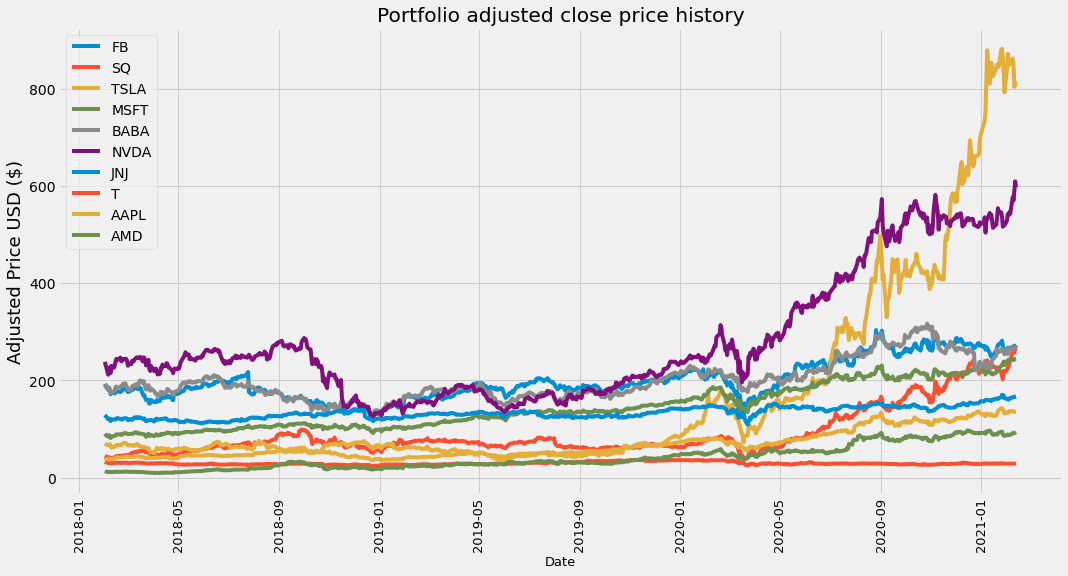

In [15]:
#show the stock portfolio 
plt.figure(figsize=(16,8))
title = 'Portfolio adjusted close price history'
my_stocks=df

#create and plot graph 
for col in my_stocks.columns.values:
    plt.plot(my_stocks[col], label = col)

plt.title(title)
plt.xlabel('Date',fontsize=13)
plt.xticks(rotation='vertical', size=13)
plt.ylabel('Adjusted Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')

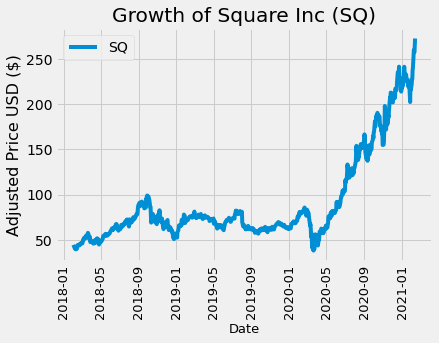

In [17]:
#Plot ticker of interest 
plt.plot(my_stocks[my_stocks.columns[1]], label=my_stocks.columns[1])
plt.title('Growth of Square Inc (SQ)')
plt.xlabel('Date',fontsize=13)
plt.xticks(rotation='vertical', size=13)
plt.ylabel('Adjusted Price USD ($)',fontsize=16)
plt.legend(loc='upper left')

In [18]:
#Show the daily simple return
returns=df.pct_change()
returns

,FB,SQ,TSLA,MSFT,BABA,NVDA,JNJ,T,AAPL,AMD
Date,,,,,,,,,,
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-02,-0.014553,-0.018898,-0.015748,-0.026310,-0.025544,-0.029023,-0.016712,-0.027835,-0.043390,-0.060377
2018-02-05,-0.047404,-0.059390,-0.030895,-0.041185,-0.036197,-0.084875,-0.052949,-0.037825,-0.024984,-0.070683
2018-02-06,0.022344,0.014383,0.002522,0.037841,0.025702,0.055592,0.011044,0.005460,0.041792,0.006914
2018-02-07,-0.027683,0.001442,0.033027,-0.018833,-0.026300,0.014274,-0.003110,0.002715,-0.021407,-0.004292
...,...,...,...,...,...,...,...,...,...,...
2021-02-08,-0.005670,0.081496,0.013130,0.001115,-0.011593,0.062376,0.002858,-0.005531,0.001097,0.040614
2021-02-09,0.010766,-0.007116,-0.016168,0.005362,0.014852,-0.012155,0.008186,-0.005214,-0.006574,-0.006122
2021-02-10,0.008981,-0.002441,-0.052551,-0.003897,0.004878,0.035125,0.003248,-0.002446,-0.004558,0.015840


In [19]:
#Create and show the annualized covariance matrix. 
#the sqrt of the variance will give us volatility
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,FB,SQ,TSLA,MSFT,BABA,NVDA,JNJ,T,AAPL,AMD
FB,0.144702,0.115055,0.087671,0.081656,0.068445,0.109764,0.031565,0.029732,0.084533,0.094494
SQ,0.115055,0.346157,0.159486,0.120635,0.102233,0.187015,0.040348,0.044127,0.115159,0.170471
TSLA,0.087671,0.159486,0.470597,0.097431,0.078347,0.138628,0.028904,0.031243,0.100541,0.135059
MSFT,0.081656,0.120635,0.097431,0.104477,0.067613,0.115425,0.042178,0.038941,0.087694,0.102188
BABA,0.068445,0.102233,0.078347,0.067613,0.132645,0.099479,0.026433,0.023103,0.069100,0.084428
NVDA,0.109764,0.187015,0.138628,0.115425,0.099479,0.248983,0.044671,0.044263,0.116261,0.193117
JNJ,0.031565,0.040348,0.028904,0.042178,0.026433,0.044671,0.055004,0.033334,0.039396,0.042465
T,0.029732,0.044127,0.031243,0.038941,0.023103,0.044263,0.033334,0.070446,0.039695,0.044158
AAPL,0.084533,0.115159,0.100541,0.087694,0.069100,0.116261,0.039396,0.039695,0.125143,0.108241
AMD,0.094494,0.170471,0.135059,0.102188,0.084428,0.193117,0.042465,0.044158,0.108241,0.347110


In [11]:
#Get the portfolio variance 
portfolio_var = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
portfolio_var

0.09475015973507343

In [12]:
#Calculate the portfolio's volatility. aka stdev 
portfolio_vol = np.sqrt(portfolio_var)
portfolio_vol

0.30781513889845225

In [13]:
#Now we can get the annual return from the portfolio 
port_simple_return_annual = np.sum(returns.mean()*weights*252)
port_simple_return_annual

0.4370863191932731

In [14]:
#We can show the expected annual return, volatility (risk), and the variance 

percent_var = str(round(portfolio_var, 2)*100)+'%'
percent_vol = str(round(portfolio_vol, 2)*100)+'%'
percent_return_annual = str(round(port_simple_return_annual, 2)*100)+'%'
print('Expected annual return: '+percent_return_annual)
print('Annual volatility(risk): '+percent_vol)
print('Annual variance: '+percent_var)

Expected annual return: 44.0%
Annual volatility(risk): 31.0%
Annual variance: 9.0%


In [15]:
#Lets figure out now how we can get a higher return for a lower risk 
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models 
from pypfopt import expected_returns

In [17]:
#Now time to optimize our portfolio 
#We will calculate the expected returns and annualized sample cov matrix of asset returns 
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for max sharpe ratio 
#Sharpe ratio adjusts a portfolio's past performance —or expected future performance— 
#for the excess risk that was taken by the investor

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)



OrderedDict([('FB', 0.0), ('SQ', 0.13967), ('TSLA', 0.43516), ('MSFT', 0.0), ('BABA', 0.0), ('NVDA', 0.0), ('JNJ', 0.0), ('T', 0.0), ('AAPL', 0.10995), ('AMD', 0.31521)])
Expected annual return: 99.2%
Annual volatility: 47.3%
Sharpe Ratio: 2.05


(0.9920634057878683, 0.4732593988289681, 2.0539759129837454)

In [31]:
#Lastly we can get the discrete allocation of each share per stock 
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices 

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Leftover funds: ${:.2f}'.format(leftover))

Discrete allocation:  {'SQ': 8, 'TSLA': 8, 'AAPL': 12, 'AMD': 51}
Leftover funds: $51.71


In [27]:
#Thanks for looking at my code. This was my first time use PyPostrfolioOpt 
#so I just wanted to understand and use the basics of it to analyze some of the stocks 
#I have in my portfolio.